In [1]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [2]:
from skimage import data
import imageio

photo_data = imageio.imread('./desktop/ODE.jpg')
type(photo_data)

imageio.core.util.Image

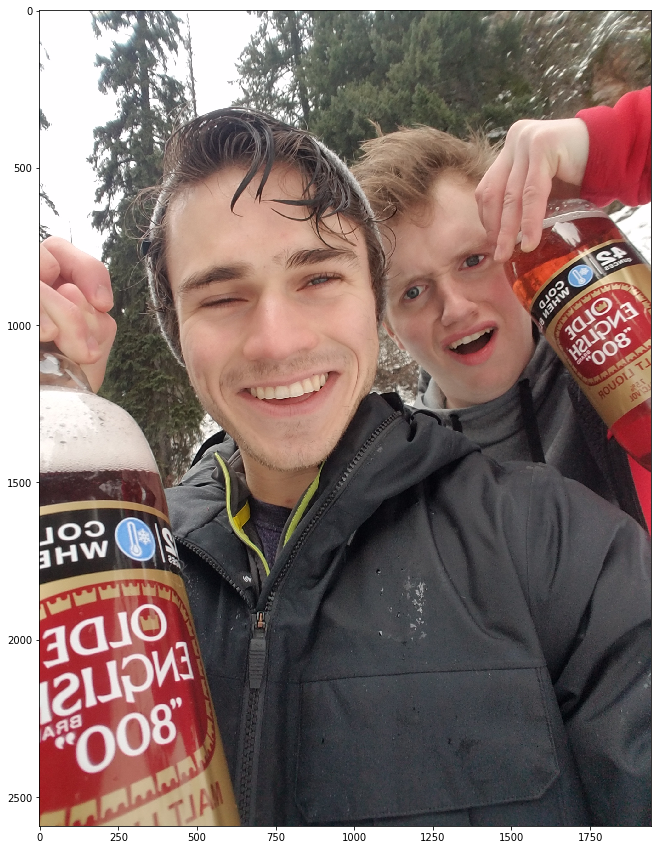

In [3]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [4]:
photo_data.shape

#print(photo_data)

(2592, 1944, 3)

In [5]:
photo_data.size

15116544

In [7]:
photo_data.min(), photo_data.max()

(0, 255)

In [8]:
photo_data.mean()

106.34103859982811

In [29]:
photo_data = imageio.imread('./desktop/ODE.jpg')
print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 150
print("Shape of low_value_filter:", low_value_filter.shape)

Shape of photo_data: (2592, 1944, 3)
Shape of low_value_filter: (2592, 1944, 3)


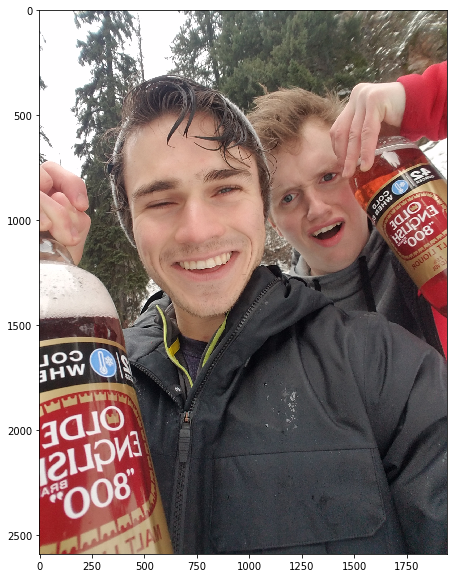

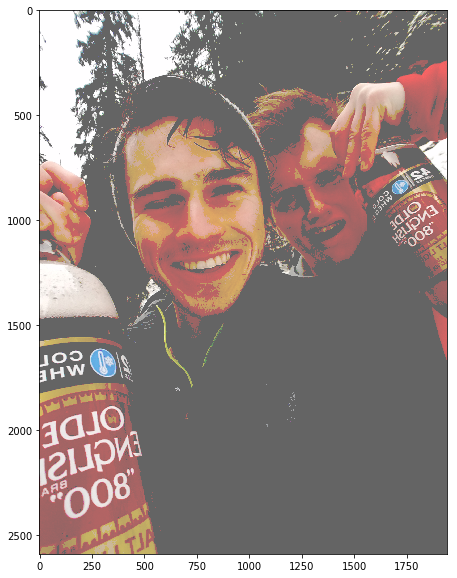

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[low_value_filter] = 100
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

In [31]:
rows_range = np.arange(len(photo_data))
cols_range = rows_range
print(type(rows_range))

<class 'numpy.ndarray'>


In [37]:
total_rows, total_cols, total_layers = photo_data.shape
print("photo_data = ", photo_data.shape)

X, Y =np.ogrid[:total_rows, :total_cols]
print("X = ", X.shape, " and Y = ", Y.shape)

photo_data =  (2592, 1944, 3)
X =  (2592, 1)  and Y =  (1, 1944)


In [40]:
center_row, center_col = total_rows / 2, total_cols / 2
print("center_row = ", center_row, "AND center_col = ", center_col)
print(X - center_row)
print(Y - center_col)
dist_from_center = (X - center_row)**2 + (Y - center_col)**2
print(dist_from_center)
radius = (total_rows / 2)**2
print("Radius = ", radius)
circular_mask = (dist_from_center > radius)
print(circular_mask)
print(circular_mask[1500:1700,2000:2200])

center_row =  1296.0 AND center_col =  972.0
[[-1296.]
 [-1295.]
 [-1294.]
 ..., 
 [ 1293.]
 [ 1294.]
 [ 1295.]]
[[-972. -971. -970. ...,  969.  970.  971.]]
[[ 2624400.  2622457.  2620516. ...,  2618577.  2620516.  2622457.]
 [ 2621809.  2619866.  2617925. ...,  2615986.  2617925.  2619866.]
 [ 2619220.  2617277.  2615336. ...,  2613397.  2615336.  2617277.]
 ..., 
 [ 2616633.  2614690.  2612749. ...,  2610810.  2612749.  2614690.]
 [ 2619220.  2617277.  2615336. ...,  2613397.  2615336.  2617277.]
 [ 2621809.  2619866.  2617925. ...,  2615986.  2617925.  2619866.]]
Radius =  1679616.0
[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]
[]


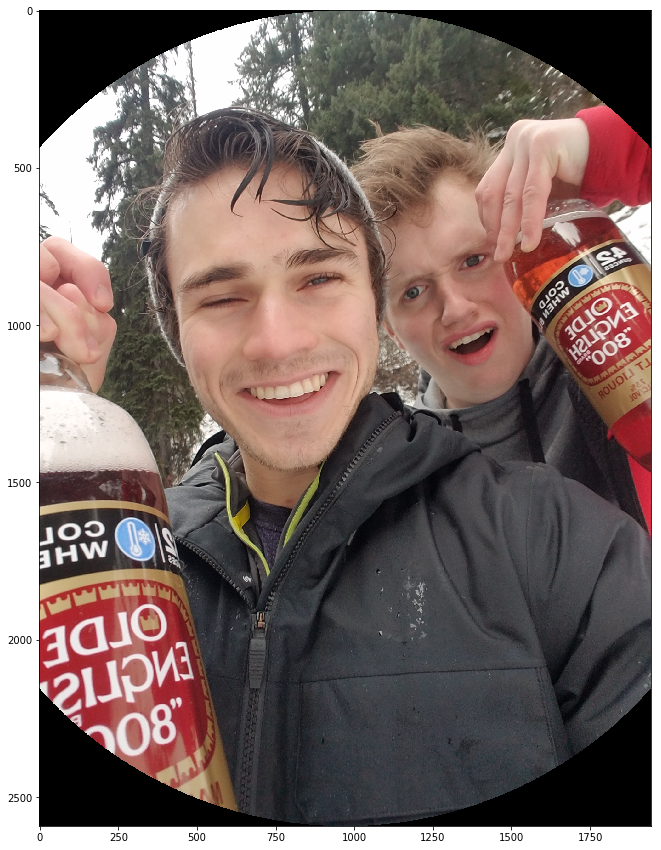

In [41]:
photo_data = imageio.imread('./desktop/ODE.jpg')
photo_data[circular_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [42]:
X, Y = np.ogrid[:total_rows, :total_cols]
half_upper = X < center_row # this line generates a mask for all rows above

half_upper_mask = np.logical_and(half_upper, circular_mask)

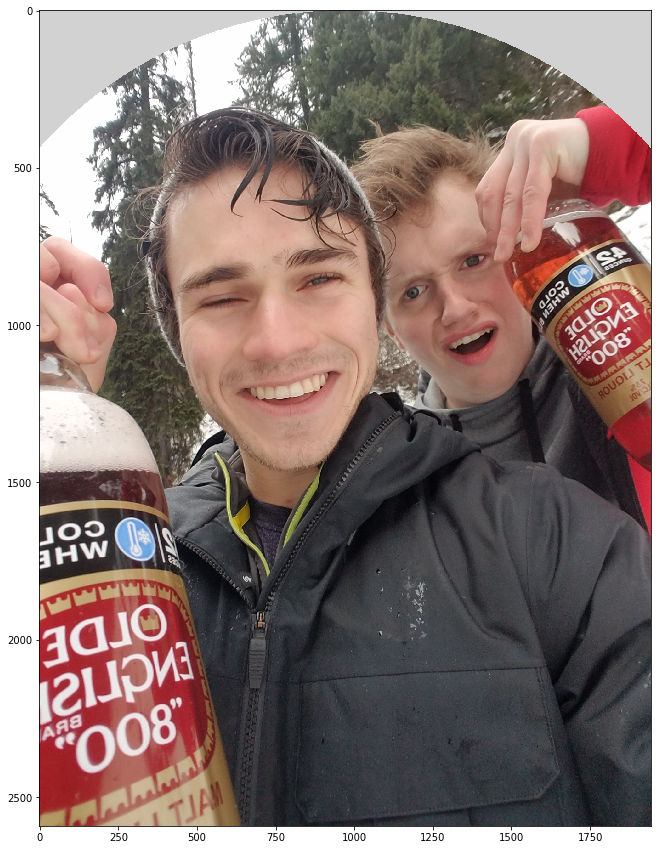

In [43]:
import random
photo_data = imageio.imread('./desktop/ODE.jpg')
photo_data[half_upper_mask] = 255
photo_data[half_upper_mask] = random.randint(200,255)
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

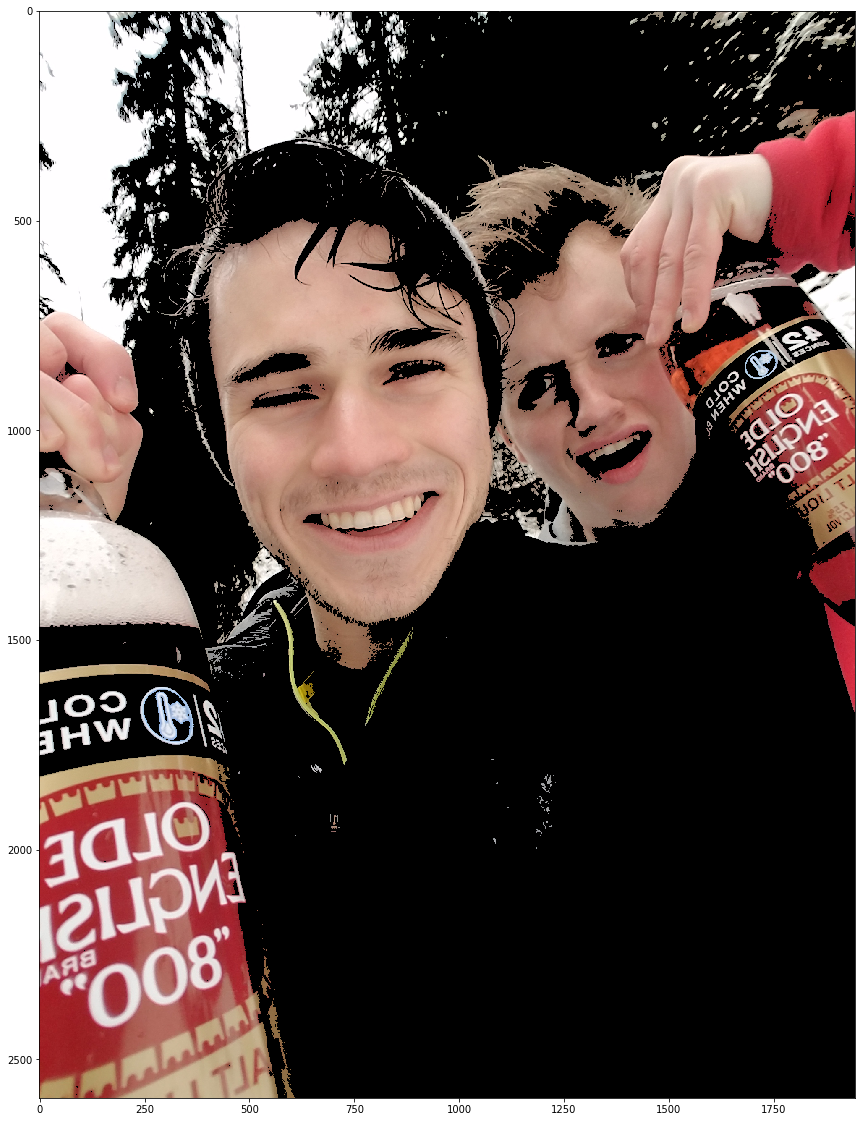

In [50]:
photo_data = imageio.imread('./desktop/ODE.jpg')
red_mask = photo_data[:, :, 0] < 140

photo_data[red_mask] = 0
plt.figure(figsize=(20,20))
plt.imshow(photo_data)

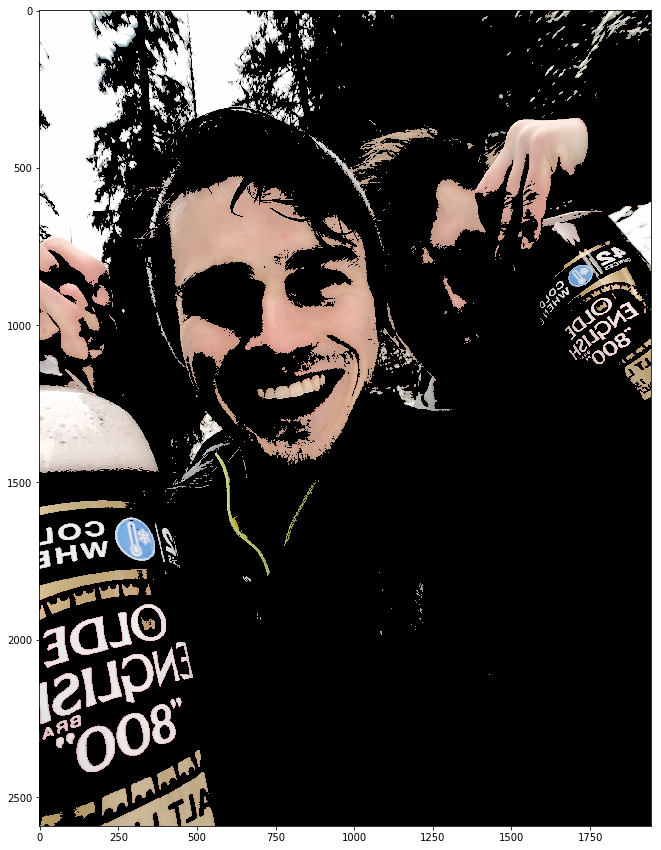

In [51]:
photo_data = imageio.imread('./desktop/ODE.jpg')
green_mask = photo_data[:, :, 1] < 150

photo_data[green_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

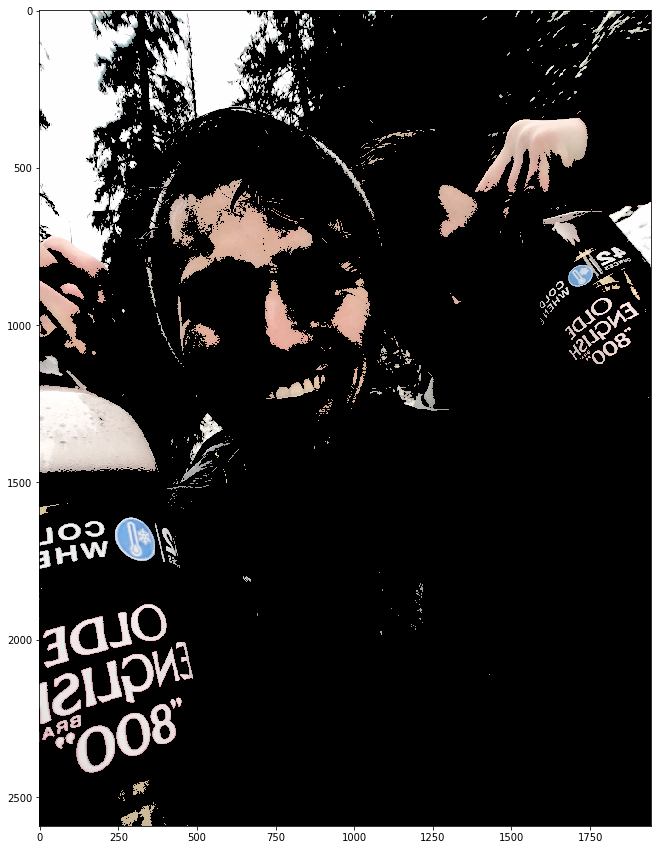

In [53]:
photo_data = imageio.imread('./desktop/ODE.jpg')
blue_mask = photo_data[:, :, 2] < 150

photo_data[blue_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

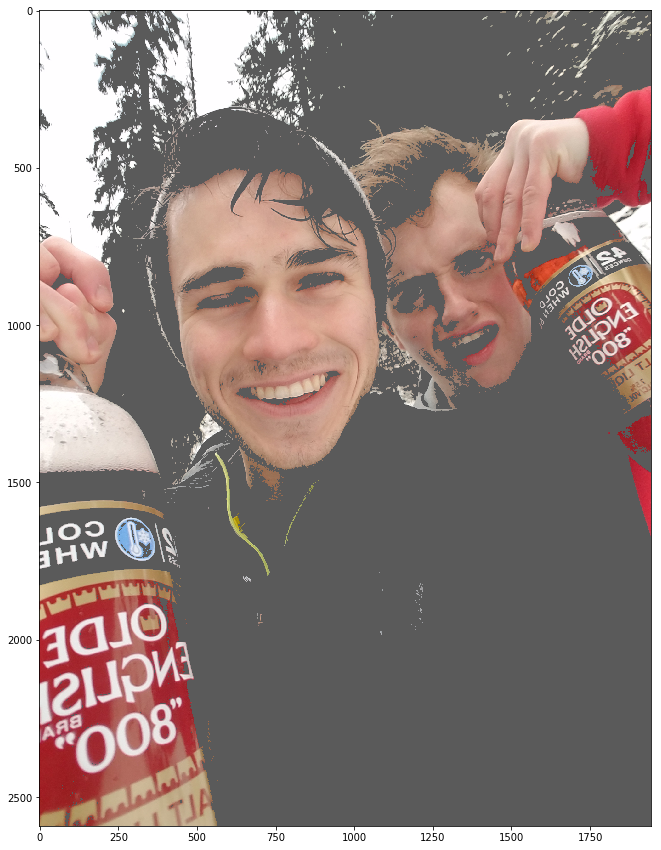

In [102]:
photo_data = imageio.imread('./desktop/ODE.jpg')

red_mask = photo_data[:, : ,0] < 150
green_mask = photo_data[:, : ,1] < 170
blue_mask = photo_data[:, : ,2] < 200

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 90
plt.figure(figsize=(15,15))
plt.imshow(photo_data)